In [2]:
import os
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from python.data import Dataloader
from python.models import RandomExampleModel
import python.metrics as metrics
from python.models import HeuristicModel, TwoClustersMIP

In [4]:
import gurobipy
gurobipy.Model()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2473476
Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr


<gurobi.Model Continuous instance Unnamed: 0 constrs, 0 vars, Parameter changes: LicenseID=2473476>

In [5]:
# Loading the data
data_loader = Dataloader("data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()
len(X)

40002

In [6]:
# Let's train an example model
model = HeuristicModel(n_clusters=3,n_pieces=5,n_criteria=10)
# Instantiation of the model with hyperparameters, if needed
model.fit(X, Y) # Training of the model, using preference data

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77758 nonzeros
Model fingerprint: 0x07a826b8
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e-04, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 197.5051646
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.06s
Presolved: 2041 rows, 2050 columns, 60564 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 1.150513e+00, 221 iterations, 0.03 seconds (0.07 work units)

    Nodes    |    Current Node    |     Ob

In [7]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[-0.07526769863937122 0.04030875565032782 -0.17709128046438727]
 [0.1187958549659438 -0.12092309969698894 -0.007898223484618605]
 [-0.02561818803971949 -0.437430670852536 0.1055081604103052]
 [-0.037947592775836925 0.19141750060678053 0.40645891380435845]
 [0.05833584578321671 0.03824007520587458 -0.16185063216639073]]


In [8]:
data_loader = Dataloader("data/dataset_10")  # Path to test dataset
X, Y = data_loader.load()

np.random.seed(123)
indexes = np.linspace(0, len(X) - 1, num=len(X), dtype=int)
np.random.shuffle(indexes)
train_indexes = indexes[: int(len(indexes) * 0.8)]
test_indexes = indexes[int(len(indexes) * 0.8) :]

X_train = X[train_indexes]
Y_train = Y[train_indexes]
model = HeuristicModel(n_clusters=3,n_pieces=5,n_criteria=10)
model.fit(X_train, Y_train)

X_test = X[test_indexes]
Y_test = Y[test_indexes]
Z_test = data_loader.get_ground_truth_labels()[test_indexes]

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77776 nonzeros
Model fingerprint: 0x02283639
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 63.3439445
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.06s
Presolved: 2041 rows, 2050 columns, 60538 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 9.359135e-01, 255 iterations, 0.04 seconds (0.08 work units)

    Nodes    |    Current Node    |     Obj

In [9]:
print((model.predict_utility(X_test) - model.predict_utility(Y_test))[:5])

[[-0.14087937 -0.02918575  0.16673505]
 [ 0.24367691 -0.02832145  0.04416482]
 [ 0.1322617   0.07279833  0.24238269]
 [-0.343418   -0.03995065 -0.05503977]
 [ 0.31070695  0.21318588  0.2863375 ]]


In [10]:
print(model.predict_preference(X_test, Y_test)[:5])

[[0 0 1]
 [1 0 1]
 [1 1 1]
 [0 0 0]
 [1 1 1]]


In [11]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X_test, Y_test)[:5] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", np.sum(pairs_explained) / 5) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 0.6


In [12]:
# Or we call directly the right metric:
pairs_explained = metrics.PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X_test, Y_test))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X_test), model.predict_utility(Y_test)))

Percentage of explained preferences for all samples: 0.979002624671916
Percentage of explained preferences for all samples: 0.979002624671916


In [13]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X_test, Y_test)[:5]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[2 0 2 1 0]


In [14]:

# We can see how it compares to our model's predictions:
print(Z_test[:5])

[0 2 0 0 0]


In [15]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = metrics.ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X_test, Y_test)[:5], Z_test[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X_test, Y_test), Z_test))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X_test, Y_test, Z_test))

Cluster intersection for 5 first samples: 0.4
Cluster intersection for all samples: 0.8441599487564054
Cluster intersection for all samples: 0.8441599487564054


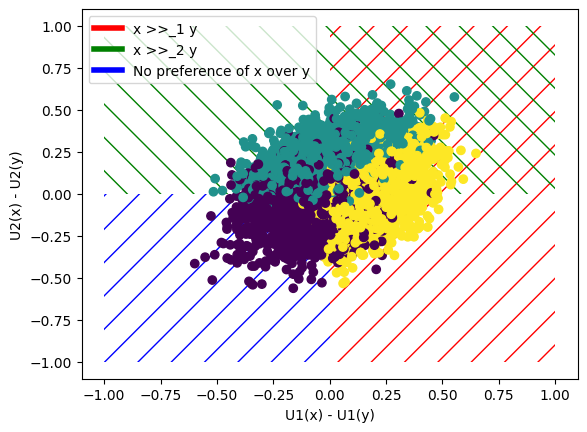

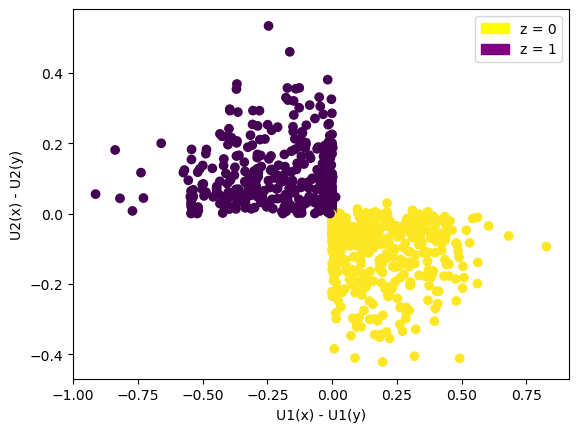

In [22]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X_test)[:, 0]-model.predict_utility(Y_test)[:, 0], 
            model.predict_utility(X_test)[:, 1]-model.predict_utility(Y_test)[:, 1], c=Z_test)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()
from IPython.display import Image
Image("images/MIP_results_example.png")

In [17]:
# This cell should work when you have completed the TwoClustersMIP model
from python.models import TwoClustersMIP

parameters = {"n_pieces": 5, "n_clusters": 2, "n_criteria": 4, "n_pairs": 2000} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)

# Uncomment once your model is working
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 6050 rows, 12048 columns and 76714 nonzeros
Model fingerprint: 0x3279e99c
Variable types: 8048 continuous, 4000 integer (4000 binary)
Coefficient statistics:
  Matrix range     [3e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 173.0309482
Presolve removed 2016 rows and 8008 columns
Presolve time: 0.08s
Presolved: 4034 rows, 4040 columns, 54836 nonzeros
Variable types: 2040 continuous, 2000 integer (2000 binary)

Root relaxation: objective 0.000000e+00, 2916 iterations, 0.29 seconds (0.65 work units)

    Nodes    |    Current Node    |

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\Lenovo Thinkpad T14\AppData\Roaming\Python\Python310\site-packages\ipykernel\iostream.py", line 624, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]
KeyboardInterrupt: 


c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77776 nonzeros
Model fingerprint: 0x02283639
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 63.3439445
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.09s
Presolved: 2041 rows, 2050 columns, 60538 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 9.359135e-01, 255 iterations, 0.04 seconds (0.08 work units)

    Nodes    |    Current Node    |     Obj

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77668 nonzeros
Model fingerprint: 0xf550ecd7
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 247.6636152
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.07s
Presolved: 2041 rows, 2050 columns, 60341 nonzeros
Found heuristic solution: objective 134.5067172
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 4.809750e-01, 192 iterations, 0.02 seconds (0.06 work un

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77637 nonzeros
Model fingerprint: 0x37a068e3
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [5e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 28.6280890
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.09s
Presolved: 2041 rows, 2050 columns, 60240 nonzeros
Found heuristic solution: objective 14.8249078
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 2.133675e-01, 176 iterations, 0.03 seconds (0.05 work unit

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77599 nonzeros
Model fingerprint: 0xc5aaf9ef
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 214.2479601
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.08s
Presolved: 2041 rows, 2050 columns, 60239 nonzeros
Found heuristic solution: objective 112.9306267
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 2.910929e-03, 136 iterations, 0.02 seconds (0.04 work un

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77639 nonzeros
Model fingerprint: 0x9c3a7c89
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [5e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 257.7427983
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.09s
Presolved: 2041 rows, 2050 columns, 60419 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 8.206782e-02, 177 iterations, 0.03 seconds (0.05 work units)

    Nodes    |    Current Node    |     Ob

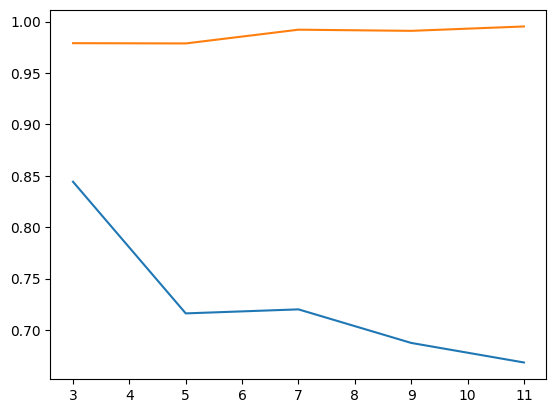

In [42]:
P=[3,5,7,9,11]
L=[]
U=[]
# data_loader = Dataloader("data/dataset_10")  # Path to test dataset
# X, Y = data_loader.load()

for x in P:    
    data_loader = Dataloader("data/dataset_10")  # Path to test dataset
    X, Y = data_loader.load()

    np.random.seed(123)
    indexes = np.linspace(0, len(X) - 1, num=len(X), dtype=int)
    np.random.shuffle(indexes)
    train_indexes = indexes[: int(len(indexes) * 0.8)]
    test_indexes = indexes[int(len(indexes) * 0.8) :]

    X_train = X[train_indexes]
    Y_train = Y[train_indexes]
    model = HeuristicModel(n_clusters=x,n_pieces=5,n_criteria=10)
    model.fit(X_train, Y_train)
    # print(test_indexes)
    X_test = X[test_indexes]
    Y_test = Y[test_indexes]
    Z_test = data_loader.get_ground_truth_labels()[test_indexes]
    L.append(cluster_intersection.from_model(model, X_test, Y_test, Z_test))
    U.append(pairs_explained.from_model(model, X_test, Y_test))

plt.plot(P,L)
plt.plot(P,U)

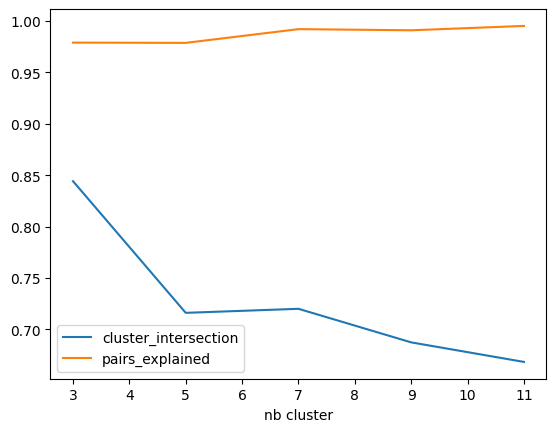

In [44]:
plt.plot(P,L,label='cluster_intersection')
plt.plot(P,U,label='pairs_explained')
plt.xlabel('nb cluster')
plt.legend()
plt.show()

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4041 rows, 10040 columns and 69941 nonzeros
Model fingerprint: 0x31fdb173
Variable types: 8040 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 86.4534359
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.06s
Presolved: 2021 rows, 2030 columns, 48793 nonzeros
Variable types: 2030 continuous, 0 integer (0 binary)

Root relaxation: objective 1.284801e+00, 180 iterations, 0.04 seconds (0.06 work units)

    Nodes    |    Current Node    |     Obj

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77776 nonzeros
Model fingerprint: 0x02283639
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 63.3439445
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.08s
Presolved: 2041 rows, 2050 columns, 60538 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 9.359135e-01, 255 iterations, 0.05 seconds (0.08 work units)

    Nodes    |    Current Node    |     Obj

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4081 rows, 10080 columns and 81488 nonzeros
Model fingerprint: 0xfb6bfe06
Variable types: 8080 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 47.6111689
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.08s
Presolved: 2061 rows, 2070 columns, 66170 nonzeros
Variable types: 2070 continuous, 0 integer (0 binary)

Root relaxation: objective 7.517814e-01, 347 iterations, 0.06 seconds (0.12 work units)

    Nodes    |    Current Node    |     Obj

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4101 rows, 10100 columns and 83736 nonzeros
Model fingerprint: 0xc05821b8
Variable types: 8100 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [5e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 37.3931022
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.09s
Presolved: 2081 rows, 2090 columns, 69553 nonzeros
Variable types: 2090 continuous, 0 integer (0 binary)

Root relaxation: objective 6.891898e-01, 377 iterations, 0.07 seconds (0.14 work units)

    Nodes    |    Current Node    |     Obj

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4121 rows, 10120 columns and 85228 nonzeros
Model fingerprint: 0xd320e75e
Variable types: 8120 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [1e-06, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 30.8644204
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.10s
Presolved: 2101 rows, 2110 columns, 71808 nonzeros
Variable types: 2110 continuous, 0 integer (0 binary)

Root relaxation: objective 5.497397e-01, 446 iterations, 0.08 seconds (0.16 work units)

    Nodes    |    Current Node    |     Obj

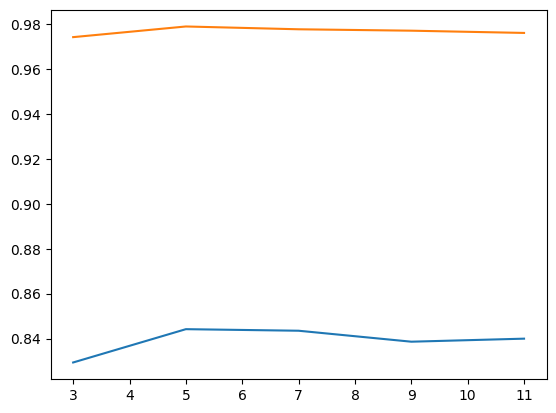

In [46]:
P=[3,5,7,9,11]
L=[]
U=[]
# data_loader = Dataloader("data/dataset_10")  # Path to test dataset
# X, Y = data_loader.load()

for x in P:    
    data_loader = Dataloader("data/dataset_10")  # Path to test dataset
    X, Y = data_loader.load()

    np.random.seed(123)
    indexes = np.linspace(0, len(X) - 1, num=len(X), dtype=int)
    np.random.shuffle(indexes)
    train_indexes = indexes[: int(len(indexes) * 0.8)]
    test_indexes = indexes[int(len(indexes) * 0.8) :]

    X_train = X[train_indexes]
    Y_train = Y[train_indexes]
    model = HeuristicModel(n_clusters=3,n_pieces=x,n_criteria=10)
    model.fit(X_train, Y_train)
    # print(test_indexes)
    X_test = X[test_indexes]
    Y_test = Y[test_indexes]
    Z_test = data_loader.get_ground_truth_labels()[test_indexes]
    L.append(cluster_intersection.from_model(model, X_test, Y_test, Z_test))
    U.append(pairs_explained.from_model(model, X_test, Y_test))

plt.plot(P,L)
plt.plot(P,U)

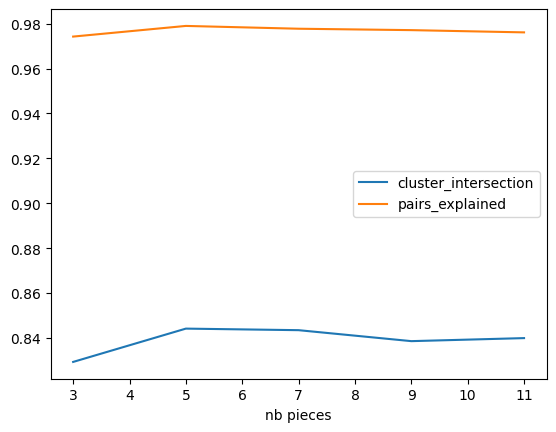

In [47]:
plt.plot(P,L,label='cluster_intersection')
plt.plot(P,U,label='pairs_explained')
plt.xlabel('nb pieces')
plt.legend()
plt.show()

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4013 rows, 10012 columns and 24992 nonzeros
Model fingerprint: 0x24e682b5
Variable types: 8012 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 221.3136220
Presolve removed 2007 rows and 8005 columns
Presolve time: 0.02s
Presolved: 2006 rows, 2007 columns, 13315 nonzeros
Found heuristic solution: objective 221.3135887
Variable types: 2007 continuous, 0 integer (0 binary)

Root relaxation: objective 1.554238e+02, 1459 iterations, 0.12 seconds (0.16 work u

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4025 rows, 10024 columns and 38307 nonzeros
Model fingerprint: 0xb20ae139
Variable types: 8024 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 166.5638256
Presolve removed 2008 rows and 8004 columns
Presolve time: 0.03s
Presolved: 2017 rows, 2020 columns, 25378 nonzeros
Variable types: 2020 continuous, 0 integer (0 binary)

Root relaxation: objective 2.296982e+01, 1046 iterations, 0.12 seconds (0.23 work units)

    Nodes    |    Current Node    |     O

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4037 rows, 10036 columns and 51255 nonzeros
Model fingerprint: 0x36c55b1d
Variable types: 8036 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 234.1873245
Presolve removed 2012 rows and 8006 columns
Presolve time: 0.06s
Presolved: 2025 rows, 2030 columns, 36934 nonzeros
Variable types: 2030 continuous, 0 integer (0 binary)

Root relaxation: objective 2.296934e+01, 1095 iterations, 0.16 seconds (0.33 work units)

    Nodes    |    Current Node    |     O

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4049 rows, 10048 columns and 64450 nonzeros
Model fingerprint: 0xbcb7cfb1
Variable types: 8048 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [4e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 196.2304711
Presolve removed 2016 rows and 8008 columns
Presolve time: 0.06s
Presolved: 2033 rows, 2040 columns, 48656 nonzeros
Variable types: 2040 continuous, 0 integer (0 binary)

Root relaxation: objective 1.877670e+01, 752 iterations, 0.11 seconds (0.25 work units)

    Nodes    |    Current Node    |     Ob

c:\Users\Lenovo Thinkpad T14\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1245U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Academic license 2473476 - for non-commercial use only - registered to ib___@student-cs.fr
Optimize a model with 4061 rows, 10060 columns and 77776 nonzeros
Model fingerprint: 0x02283639
Variable types: 8060 continuous, 2000 integer (2000 binary)
Coefficient statistics:
  Matrix range     [2e-05, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 63.3439445
Presolve removed 2020 rows and 8010 columns
Presolve time: 0.08s
Presolved: 2041 rows, 2050 columns, 60538 nonzeros
Variable types: 2050 continuous, 0 integer (0 binary)

Root relaxation: objective 9.359135e-01, 255 iterations, 0.04 seconds (0.08 work units)

    Nodes    |    Current Node    |     Obj

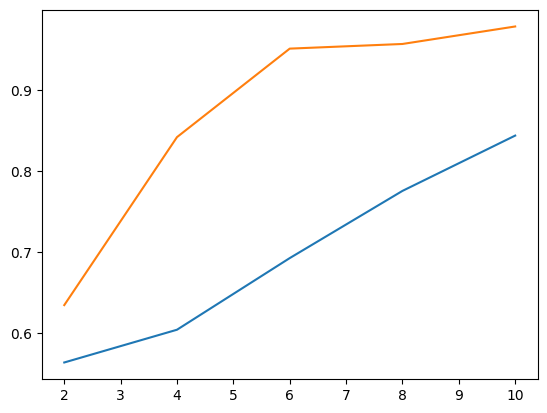

In [53]:
P=[2,4,6,8,10]
L=[]
U=[]
# data_loader = Dataloader("data/dataset_10")  # Path to test dataset
# X, Y = data_loader.load()

for x in P:    
    data_loader = Dataloader("data/dataset_10")  # Path to test dataset
    X, Y = data_loader.load()

    np.random.seed(123)
    indexes = np.linspace(0, len(X) - 1, num=len(X), dtype=int)
    np.random.shuffle(indexes)
    train_indexes = indexes[: int(len(indexes) * 0.8)]
    test_indexes = indexes[int(len(indexes) * 0.8) :]

    X_train = X[train_indexes]
    Y_train = Y[train_indexes]
    model = HeuristicModel(n_clusters=3,n_pieces=5,n_criteria=x)
    model.fit(X_train, Y_train)
    # print(test_indexes)
    X_test = X[test_indexes]
    Y_test = Y[test_indexes]
    Z_test = data_loader.get_ground_truth_labels()[test_indexes]
    L.append(cluster_intersection.from_model(model, X_test, Y_test, Z_test))
    U.append(pairs_explained.from_model(model, X_test, Y_test))

plt.plot(P,L)
plt.plot(P,U)

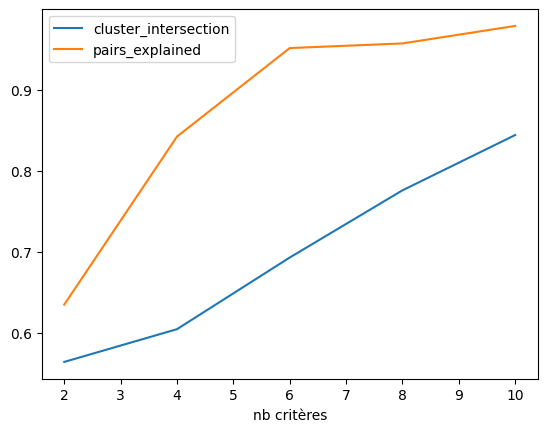

In [54]:
plt.plot(P,L,label='cluster_intersection')
plt.plot(P,U,label='pairs_explained')
plt.xlabel('nb critères')
plt.legend()
plt.show()

(0.0, 1.0)

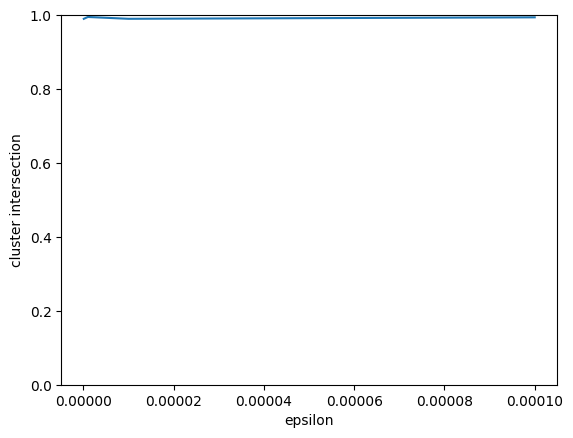

In [4]:
I=[10**-7,10**-6,10**-5,10**-4]
L=[0.99,0.995,0.9900450225112556,0.9940150075037518]
C=[0.844,0.844,0.844,0.838]
plt.plot(I,L)
plt.xlabel('epsilon')
plt.ylabel('cluster intersection')
axe=plt.gca()
axe.set_ylim([0, 1])

(0.0, 1.0)

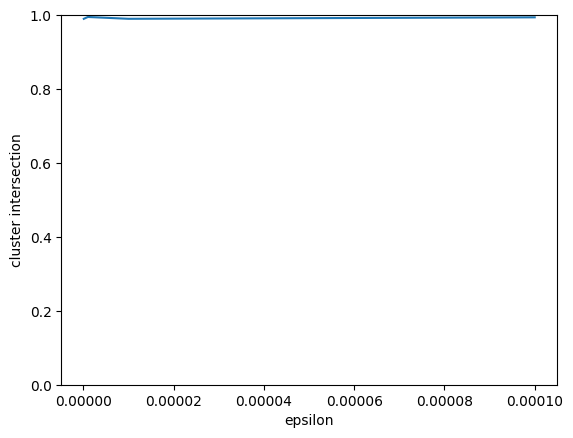

In [6]:
plt.plot(I,L)
plt.xlabel('epsilon')
plt.ylabel('cluster intersection')
axe=plt.gca()
axe.set_ylim([0, 1])